# Customer Clustering
## Saeed Hosseini

<saeed144.73@gmail.com>


Customer Clustering is a code for clustering your customers according to gender, age, annual income, and spending Score.

Thanks to Jadi and Saeed Aghabozorgi from Google.

v1.0.0

7-Nov-2021

<h1 style="text-align: center; color: red;">START</h1>

<h2 style="display: inline;">Step 1)</h2><h2 style="display: inline; text-align: left; color: blue;">READ PURE DATA SET</h2>

In [1]:
import pandas as pd

In [2]:
cust_df = pd.read_csv("customers_dataset.csv")
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
cust_df.shape

(200, 5)

<h2 style="display: inline;">Step 2)</h2><h2 style="display: inline; text-align: left; color: blue;">DATA CLEANSING</h2>

In [4]:
cust_df.info()
print("SSSSSSSSSSSSSSSSSSSSSSSSSS")
print("Number of NULLs = " + str(cust_df.isnull().sum().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
SSSSSSSSSSSSSSSSSSSSSSSSSS
Number of NULLs = 0


**Fortunately there are no missing data**

**Genders are non-numeric data, so we should change them to numeric data
(0 for females and 1 for males)**

In [5]:
cust_df["Gender"].replace({"Male": 1, "Female": 0}, inplace=True)

In [6]:
cust_df.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [7]:
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


**Data are ready :-)**

<h2 style="display: inline;">Step 3)</h2><h2 style="display: inline; text-align: left; color: blue;">ANALYZE DATA AND PREPROCESSING</h2>

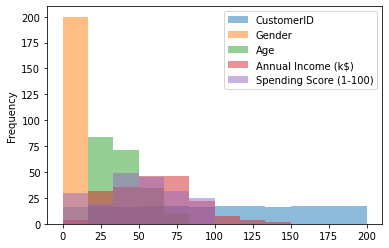

In [8]:
ax = cust_df.plot.hist(bins=12, alpha=0.5)

**Let's change dataframe to numpy array**

**We do not need the customers' ID**

In [9]:
X = cust_df.values[:,1:]
X

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

**Becuase of we need compare our data with eachother we should
normalize them first**

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
standard_scaler = StandardScaler()
cust_dataset = standard_scaler.fit_transform(X)
cust_dataset

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

<h2 style="display: inline;">Step 4)</h2><h2 style="display: inline; text-align: left; color: blue;">ML Algorithms</h2>

**Let's start clustering with the K-Means algorithm**

In [12]:
from sklearn.cluster import KMeans
clust_num = 4
k_means = KMeans(init = "k-means++", n_clusters = clust_num, n_init = 12)
k_means.fit(cust_dataset)
k_means_labels = k_means.labels_
print(k_means_labels)

[0 0 1 3 3 3 1 3 2 3 2 3 1 3 2 0 1 0 2 3 2 0 1 0 1 0 1 0 1 3 2 3 2 0 1 3 1
 3 1 3 1 0 2 3 1 3 1 3 3 3 1 0 3 2 1 2 1 2 3 2 2 0 1 1 2 0 1 1 0 3 2 1 1 1
 2 0 1 2 3 1 2 0 2 1 3 2 1 3 3 1 1 0 2 1 3 0 1 3 2 0 3 1 2 0 2 3 1 2 2 2 2
 3 1 0 3 3 1 1 1 1 0 1 3 0 3 3 2 0 2 0 2 0 3 3 0 3 1 0 0 3 1 0 3 3 0 0 2 3
 1 0 2 0 1 3 1 3 2 3 2 3 1 3 0 3 2 3 2 3 1 0 2 0 2 0 1 3 2 0 2 0 1 3 2 3 1
 0 1 0 1 3 1 3 2 3 1 3 1 0 0 0]


**Let's improve our algorithm**

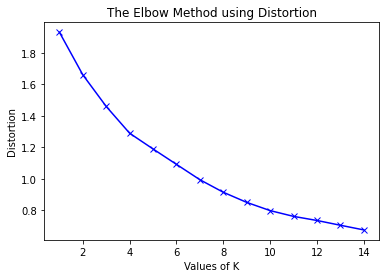

In [14]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
for k in K:
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
    k_means.fit(cust_dataset)
    distortions.append(sum(np.min(cdist(cust_dataset, k_means.cluster_centers_,
                                        'euclidean'), axis=1)) / cust_dataset.shape[0])
    inertias.append(k_means.inertia_)
    
    mapping1[k] = sum(np.min(cdist(cust_dataset, k_means.cluster_centers_,
                                   'euclidean'), axis=1)) / cust_dataset.shape[0]
    mapping2[k] = k_means.inertia_

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

**We can see that our optimal number of clusters according to distortion around centroids is 6**

**Let's try it**

In [15]:
clust_num = 6
k_means = KMeans(init = "k-means++", n_clusters = clust_num, n_init = 12)
k_means.fit(cust_dataset)
k_means_labels = k_means.labels_
print(k_means_labels)

[0 0 2 4 4 4 2 4 1 4 1 4 2 4 0 0 2 0 1 4 0 0 2 0 2 0 2 0 2 4 1 4 1 0 2 4 2
 4 2 4 2 0 1 4 2 4 2 4 4 4 2 0 4 1 2 1 2 1 4 1 1 0 2 2 1 0 2 2 0 4 1 2 2 2
 1 0 2 0 4 2 1 0 1 2 4 1 2 4 4 2 2 0 1 2 4 0 2 4 1 0 4 2 1 0 1 4 2 1 1 1 1
 4 2 0 4 4 2 2 2 2 0 2 4 5 4 4 3 5 1 5 3 5 4 4 3 4 2 5 3 4 2 5 4 4 3 5 3 4
 2 5 3 5 2 4 2 4 3 4 3 4 2 4 3 4 3 4 3 4 2 5 3 5 3 5 2 4 3 5 3 5 2 4 3 4 2
 5 2 5 2 5 2 4 3 5 2 5 2 5 3 5]


**Now we change our algorithm to the Hierarchical**

In [16]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(cust_dataset,cust_dataset)
print(dist_matrix)

[[0.         1.63681098 2.38878538 ... 4.54611614 4.81867651 5.02250496]
 [1.63681098 0.         3.54154808 ... 4.3182849  5.31878915 4.70189264]
 [2.38878538 3.54154808 0.         ... 5.42195122 5.13299938 5.90251765]
 ...
 [4.54611614 4.3182849  5.42195122 ... 0.         2.21418015 0.5647686 ]
 [4.81867651 5.31878915 5.13299938 ... 2.21418015 0.         2.5274803 ]
 [5.02250496 4.70189264 5.90251765 ... 0.5647686  2.5274803  0.        ]]


In [17]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\USER1-~1\AppData\Local\Temp/ipykernel_3952/3409742170.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


In [19]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

C:\Users\user1-cayan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 0, 4, 0, 3, 0, 4, 0, 4, 0, 4, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 3, 1, 0, 4, 0, 4, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       3, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3,
       3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 3, 0, 1, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 5, 5, 2, 5, 2, 5,
       5, 5], dtype=int64)

**Finally we use DBSCAN**

In [30]:
from sklearn.cluster import DBSCAN
import sklearn.utils
sklearn.utils.check_random_state(1000)
db_dataSet = cust_df[['Annual Income (k$)','Spending Score (1-100)']]
db_dataSet = np.nan_to_num(db_dataSet)
db_dataSet = StandardScaler().fit_transform(db_dataSet)

db = DBSCAN(eps=0.15, min_samples=10).fit(db_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
db_labels = db.labels_
db_labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0,  0,  0, -1,  0, -1,  0,
       -1, -1, -1, -1,  0,  0, -1,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

<h2 style="display: inline;">Step 5)</h2><h2 style="display: inline; text-align: left; color: blue;">INSIGHT</h2>

**1.K-Means**

In [21]:
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [22]:
k_cust_df = cust_df.copy()
k_cust_df['Clust'] = k_means_labels
k_cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clust
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,2
3,4,0,23,16,77,4
4,5,0,31,17,40,4


In [23]:
k_cust_df['Clust'].value_counts()

2    55
4    54
1    26
0    25
5    21
3    19
Name: Clust, dtype: int64

In [24]:
k_cust_df.groupby('Clust').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clust,,,,,
0,54.440000,1.000000,25.720000,40.400000,59.000000
1,71.653846,1.000000,58.846154,48.692308,39.846154
2,94.818182,0.000000,48.109091,58.818182,34.781818
3,161.105263,1.000000,38.473684,85.894737,14.210526
4,95.037037,0.000000,28.000000,56.759259,66.722222
5,165.142857,0.857143,33.714286,90.666667,83.000000


C:\Users\USER1-~1\AppData\Local\Temp/ipykernel_3952/542165027.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 2], X[:, 3], s=area, c=k_means_labels.astype(np.float), alpha=0.5)


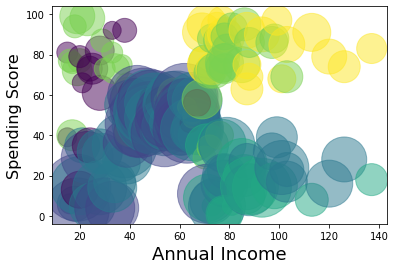

In [25]:
area = X[:, 1]**2
plt.scatter(X[:, 2], X[:, 3], s=area, c=k_means_labels.astype(np.float), alpha=0.5)
plt.xlabel('Annual Income', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)

plt.show()

**Because we are in 3D space, a 2D chart does not present good insight**

**2.Heirarchical**

In [26]:
heirch_cust_df = cust_df.copy()
heirch_cust_df['Cluster'] = agglom.labels_
heirch_cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,4
3,4,0,23,16,77,0
4,5,0,31,17,40,3


In [27]:
heirch_cust_df['Cluster'].value_counts()

3    58
0    55
1    45
2    30
4     6
5     6
Name: Cluster, dtype: int64

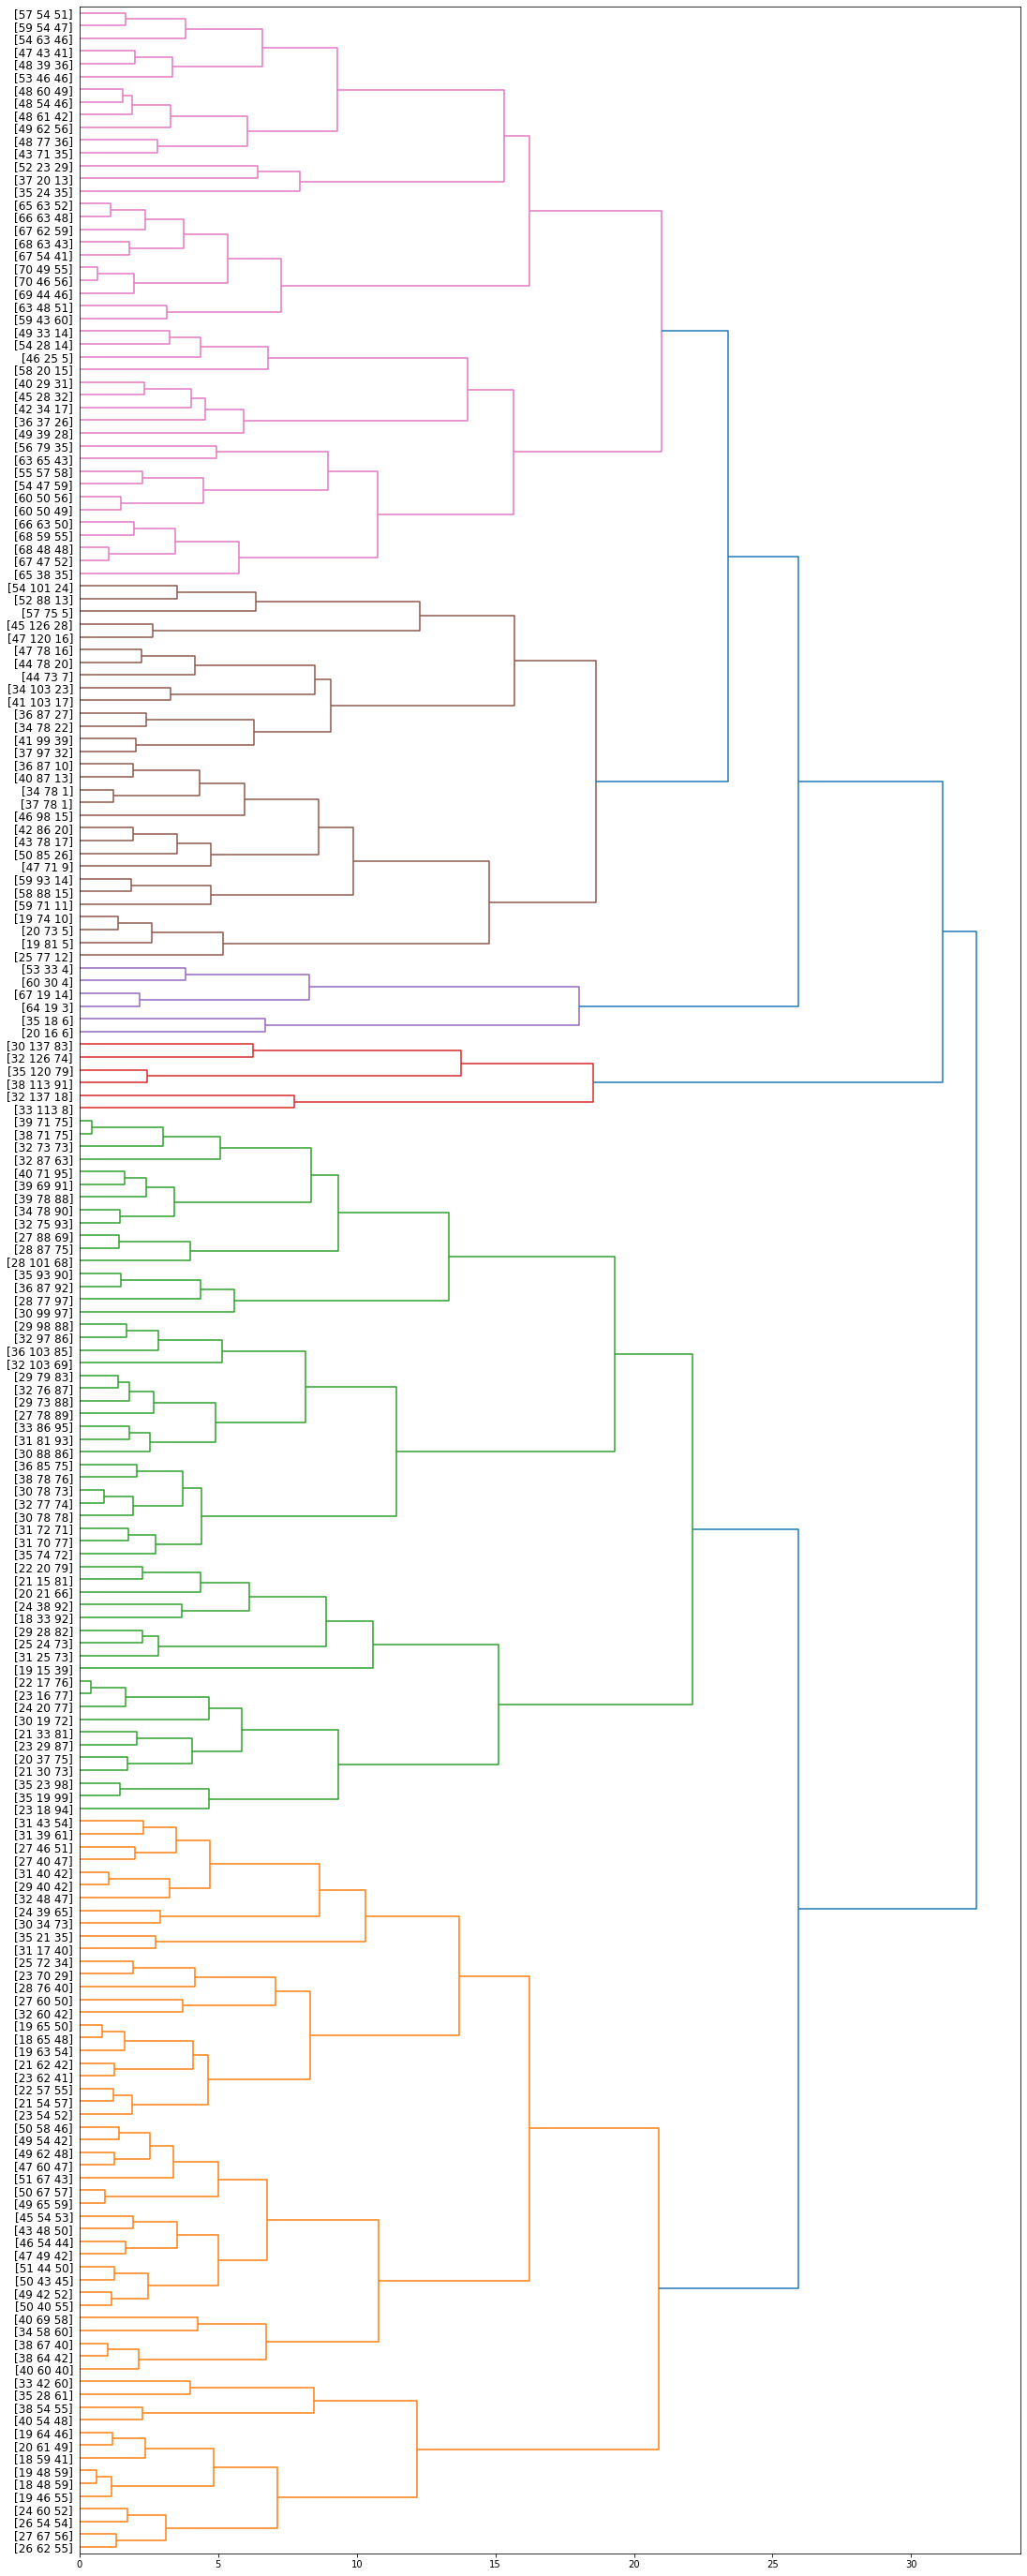

In [28]:
import pylab
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (cust_df['Age'][id], cust_df['Annual Income (k$)'][id], int(float(cust_df['Spending Score (1-100)'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

**3.DBSCAN**

In [34]:
db_cust_df = cust_df.copy()
db_cust_df['Cluster'] = db_labels
db_cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,-1
1,2,1,21,15,81,-1
2,3,0,20,16,6,-1
3,4,0,23,16,77,-1
4,5,0,31,17,40,-1


In [35]:
db_cust_df['Cluster'].value_counts()

-1    187
 0     13
Name: Cluster, dtype: int64

**It seems DBSCAN is not good for this dataset**